<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/VisualizingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS:

In [1]:
import numpy as np
import tensorflow as tf
import random
import math
from matplotlib import pyplot as plt

Creating the data:

In [2]:
x = np.array([[random.random()*100+20, random.random()*-100+20, random.random()*10-10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*100-120, random.random()*-100-120, random.random()*50+10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 9)
(20000,)
[[ 9.75018705e+01 -1.96657969e+01 -7.41592891e+00 ...  7.13352293e-02
   3.00000000e+00 -8.08735582e-01]
 [ 1.16154232e+02 -6.12861416e+01 -2.36948595e-02 ...  1.86602748e-01
   3.00000000e+00 -4.15978464e-01]
 [ 8.74300191e+01 -3.18719909e+01 -8.49927135e+00 ...  5.96410762e-01
   3.00000000e+00 -5.27987915e-01]
 ...
 [-6.63628594e+01 -1.33296362e+02  2.14449056e+01 ...  9.64346916e-01
   3.00000000e+00  1.06593717e+00]
 [-1.11506595e+02 -1.72497506e+02  2.13541712e+01 ...  7.52405569e-02
   3.00000000e+00  1.65548467e+00]
 [-1.16730351e+02 -2.14844587e+02  4.87241402e+01 ...  3.35561633e-01
   3.00000000e+00  1.58586863e+00]]


## MODEL:

In [3]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(5, activation='sigmoid'),
                                    tf.keras.layers.Dense(2, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=50, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 7.8653e-06 - accuracy: 1.0000


[7.865293810027651e-06, 1.0]

## CREATING INDIVIDUAL BASIS CLASS:

In [4]:
class NueralNetVisualizer:
  def __init__(self, X, model):
    self.X = X
    self.model = model
    self.layer_wise_output_values = None
    self.model_weights = model.get_weights()
    self.activations = None
    self.img = None
  
  def layer_wise_output(self):
    x = self.X
    output_names = [l.name for l in self.model.layers]
    self.model.outputs = [l.output for l in self.model.layers]
    self.model.build(input_shape=(x.shape[0],))
    output_values = self.model(np.array([x]))
    layer_name_to_output_value = dict(zip(output_names, output_values))
    
    self.layer_wise_output_values = [x]
    for key, item in layer_name_to_output_value.items():
      self.layer_wise_output_values.append(np.array(item[0]))

  def scoring_neurons_layerwise(self, layer_index):
    input = self.layer_wise_output_values[layer_index]
    weight = self.model_weights[layer_index*2]
    bias = self.model_weights[layer_index*2+1]
    output = self.layer_wise_output_values[layer_index+1]
    importance = []
    for index in range(weight.shape[1]):
      strengths = input * weight.T[index] - bias[index]
      strengths = strengths - np.min(strengths)
      strengths = strengths/np.sum(strengths)
      importance.append(strengths)
    importance = np.array(importance)
    neuron_scores = np.mean(importance, axis=0)
    return neuron_scores
  
  def image_initializer(self):
    layers_len = len(self.layer_wise_output_values)
    max_neurons = max([layer.shape[0] for layer in self.layer_wise_output_values])
    return np.full((layers_len, max_neurons), -1.0)
    
  def add_to_image(self, neuron_scores, layer_index):
    right = (self.img.shape[1] - neuron_scores.shape[0])//2
    left = self.img.shape[1] - right -  neuron_scores.shape[0]
    img_row = np.array([-1.0 for _ in range(right)] + [val for val in neuron_scores] + [-1.0 for _ in range(left)])
    self.img[layer_index] = img_row    

  def draw_image(self):
    fig, ax = plt.subplots()
    cmap = plt.cm.viridis
    cmap.set_under(color='black')  
    ax.imshow(self.img, vmin=-0.01, vmax=1, cmap=cmap)
    for i in range(self.img.shape[0]):
        for j in range(self.img.shape[1]):
            ax.text(j, i, "{:.2f}".format(self.img[i,j]), ha="center", va="center")

  def iterating_through_layers(self):
    self.layer_wise_output()
    self.img = self.image_initializer()
    self.draw_image()
    for layer_index in range(len(self.model_weights)//2):
      neuron_scores = self.scoring_neurons_layerwise(layer_index)
      self.add_to_image(neuron_scores, layer_index)
      self.draw_image()
      plt.pause(0.01)
    output = self.layer_wise_output_values[layer_index+1]
    output = np.array([1 for _ in range(output.shape[0])])
    output = output/np.sum(output)
    self.add_to_image(output, layer_index+1)
    self.draw_image()
    plt.pause(0.01)
    plt.show()

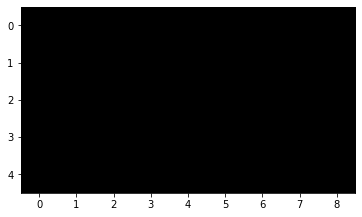

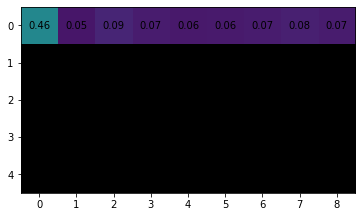

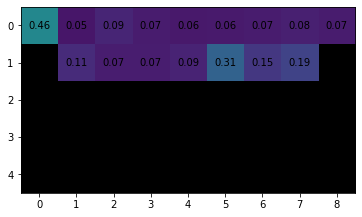

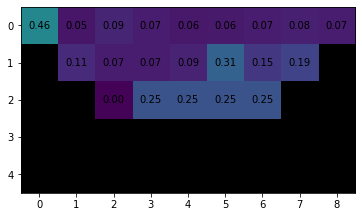

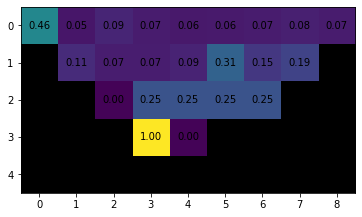

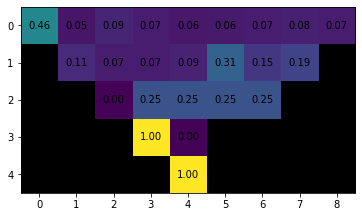

In [5]:
nnv = NueralNetVisualizer(x[1], model)
nnv.iterating_through_layers()

## LET US TAKE A LOOK AT ANOTHER EXAMPLE:

In [6]:
x = np.array([[random.random()*100+200, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*-100-220, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 7)
(20000,)
[[ 2.88657050e+02  8.95406050e-02  1.00000000e+01 ...  8.12341154e-01
   3.00000000e+00 -3.50100793e-01]
 [ 2.11273167e+02  2.18291428e-01  1.00000000e+01 ...  1.55441612e-01
   3.00000000e+00 -8.79621850e-01]
 [ 2.33139520e+02  2.73244194e-01  1.00000000e+01 ...  3.02506698e-01
   3.00000000e+00 -9.79222166e-02]
 ...
 [-3.10202700e+02  3.09901450e-01  1.00000000e+01 ...  1.99349141e-01
   3.00000000e+00  1.42260980e+00]
 [-3.18023521e+02  9.51519363e-01  1.00000000e+01 ...  3.66062531e-01
   3.00000000e+00  1.48470504e+00]
 [-2.48434558e+02  2.74372102e-01  1.00000000e+01 ...  9.49722004e-01
   3.00000000e+00  1.78158022e+00]]


In [7]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(3, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 1.8388e-08 - accuracy: 1.0000


[1.838843566304149e-08, 1.0]

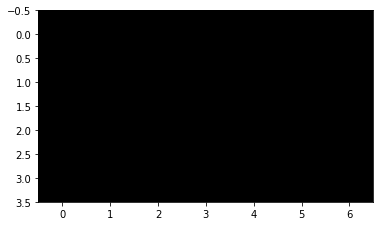

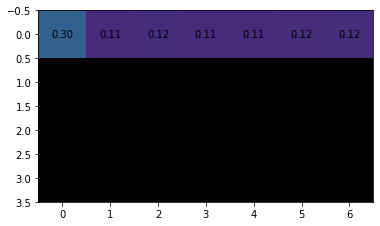

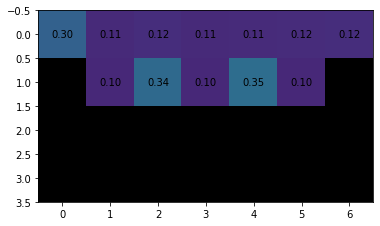

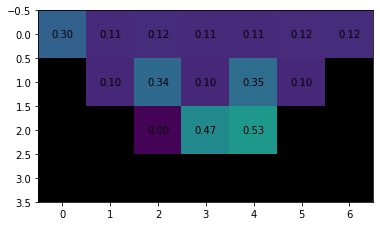

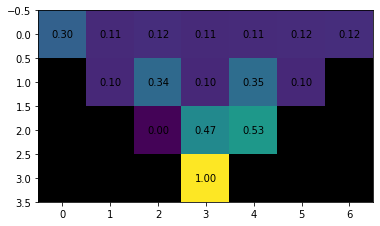

In [8]:
nnv = NueralNetVisualizer(x[0], model)
nnv.iterating_through_layers()